#Quiz 4
**Aaron Wiegand, aaron.wiegand@jhu.edu, hwiegan1**


#Question 1

In [0]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm
import statsmodels.api as sm2
import torch


In [191]:
#load in the kirby21 dataset
! if [ ! -e kirby21.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi
  
#read in the data with pandas
df = pd.read_csv("kirby21.csv")

#Extract the relevant data from the data frame
#drop the rawid and unnamed columns
df = df.drop(['Unnamed: 0', 'rawid','min','max','mean','std','id','icv','tbv'],\
            axis = 1)

#extract the CSF type 1 level 1 data 
csf = df.loc[(df.type ==1) & (df.level == 1) & (df.roi == 'CSF')]

#extract the type 1 level 1 volume data for L and R telencephalon 
vol_left = df.loc[(df.type ==1) & (df.level == 1) & (df.roi == 'Telencephalon_L')]
vol_right = df.loc[(df.type ==1) & (df.level == 1) & (df.roi == 'Telencephalon_R')]

#drop unecessary columns
vol_left = vol_left.drop(['roi','type','level'],\
                    axis =1)
vol_right = vol_right.drop(['roi','type','level'],\
                    axis =1)
csf = csf.drop(['roi','type','level'],\
                    axis =1)
             
#vectorize
X1 = np.asarray(vol_left).reshape(20)
X2 = np.asarray(vol_right).reshape(20)
Y = np.asarray(csf).reshape(20)

#construct the new data frame
d = {'L': X1, 'R': X2, 'CSF': Y}
dat = pd.DataFrame(data = d, columns = ['L','R','CSF'])

#show new data frame
dat.head(4)

,L,R,CSF
0,531111,543404,109776
1,545603,552216,107334
2,483107,490805,94254
3,558849,568830,67156


In [192]:
#ordinary least squares model to predict CSF using left and right volume data -- DO NOT DO ANY DATA SPLITTING 
results = smf.ols('CSF ~ L + R',data = dat).fit()

#interpret the coefficients

print('Interpretation of the coefficients:\nThe y intercept tells you the predicted y value of the fitted line when all parameters (L and R volume) are zero.\nThe linear regression equation is CSF = 1.9498(Left Volume) -1.7003(Right Volume) -2.287e+04 \nwhere the weights are the coefficients in front of the volumes and the y intercept beta_0 is subtracted at the end.\n')
print(results.summary())


Interpretation of the coefficients:
The y intercept tells you the predicted y value of the fitted line when all parameters (L and R volume) are zero.
The linear regression equation is CSF = 1.9498(Left Volume) -1.7003(Right Volume) -2.287e+04 
where the weights are the coefficients in front of the volumes and the y intercept beta_0 is subtracted at the end.

                            OLS Regression Results                            
Dep. Variable:                    CSF   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     2.941
Date:                Fri, 27 Sep 2019   Prob (F-statistic):             0.0800
Time:                        19:45:55   Log-Likelihood:                -223.51
No. Observations:                  20   AIC:                             453.0
Df Residuals:                      17   BIC:                             456.0
Df Mode

In [193]:
#trying a second ordinary least squares linear regression model:
x = dat[['L','R']]
y = dat[['CSF']]
results = sm2.OLS(y, x).fit()

#interpret the coefficients
print('Interpreting the coefficients: \nCSF = 1.7698(Left Volume)  -1.5678(Right Volume) \nwhere the weights are the coefficients in front of the volumes and the y intercept beta_0 is centered at 0.')
print('The R-squared value is significantly higher than the one in the model above, indicating that this model is a better fit of the data.\n')
print(results.summary())




Interpreting the coefficients: 
CSF = 1.7698(Left Volume)  -1.5678(Right Volume) 
where the weights are the coefficients in front of the volumes and the y intercept beta_0 is centered at 0.
The R-squared value is significantly higher than the one in the model above, indicating that this model is a better fit of the data.

                                 OLS Regression Results                                
Dep. Variable:                    CSF   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              234.4
Date:                Fri, 27 Sep 2019   Prob (F-statistic):                    1.29e-13
Time:                        19:45:55   Log-Likelihood:                         -223.63
No. Observations:                  20   AIC:                                      451.3
Df Residuals:                      18   BIC:                

#Question 2

In [194]:
#load the admissions data

#load in the kirby21 dataset
! if [ ! -e binary.csv ] ; \
  then wget https://stats.idre.ucla.edu/stat/data/binary.csv; \
fi
  
#read in the data with pandas
adm = pd.read_csv("binary.csv")

#show the first 4 rows of the df
adm.head(4)


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4


In [195]:
#Create a logistic regression model to predict graduate school admission using gpa, gre score and undergraduate department prestige (rank). 
#Hold out 25% of the data (randomly selected) for testing and 75% for training

#load the data into x and y
x = adm[['gre','gpa','rank']]
y = adm[['admit']]


#split into testing and training sets
trainFraction = .75
np.random.seed(2)
sample = np.random.uniform(size = 400) < trainFraction

## Add the intercept column
x = sm.tools.add_constant(x)

#define training and testing data
xtrain = x[sample]
xtest = x[~sample]
ytrain = y[sample]
ytest = y[~sample]

#apply the logistic regression model
fit = sm.discrete.discrete_model.Logit(ytrain, xtrain).fit()

#interpret the logistic regression coefficients
print('\nInterpretation of the logistic regression coefficients:\nThe coefficients tell you the log odds of the predicted values. \ni.e. the y intercept (beta_0 coefficient) tells you the log odds of being accepted when all parameters including gpa, gre, and rank are zero.\n')

#show results
print(fit.summary())


Optimization terminated successfully.
         Current function value: 0.571653
         Iterations 6

Interpretation of the logistic regression coefficients:
The coefficients tell you the log odds of the predicted values. 
i.e. the y intercept (beta_0 coefficient) tells you the log odds of being accepted when all parameters including gpa, gre, and rank are zero.

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  310
Model:                          Logit   Df Residuals:                      306
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Sep 2019   Pseudo R-squ.:                 0.09429
Time:                        19:45:56   Log-Likelihood:                -177.21
converged:                       True   LL-Null:                       -195.66
Covariance Type:            nonrobust   LLR p-value:                 4.832e-08
 

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
#predict the probability of admission for your testing data
yhat_test = fit.predict(xtest)

#for each threshold, threshold your predicted probabilities and compare
fpr, tpr, threshold = skl.metrics.roc_curve(ytest, yhat_test)
roc_auc = skl.metrics.auc(fpr, tpr)


#compute the accuracy = true positive rate (tpr) + true negative rate (specificity)
#tpr = np.asarray(tpr)
#fpr = np.asarray(fpr)
acc = np.add(tpr, 1-fpr) / 2


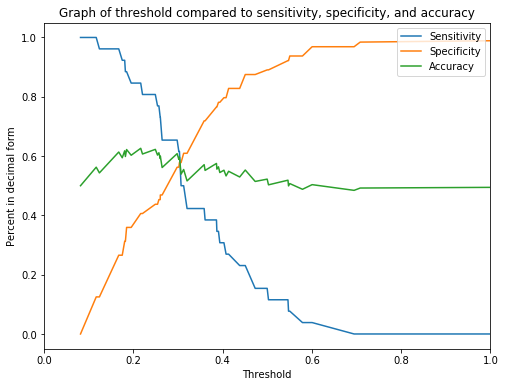

In [197]:
#make plots
plt.figure(figsize = (8,6))
plt.plot(threshold,tpr) #sensitivity aka true positive rate
plt.plot(threshold, 1-fpr) #specificity aka true negative rate
plt.plot(threshold,acc)

plt.xlabel('Threshold')
plt.xlim(0,1)
plt.title('Graph of threshold compared to sensitivity, specificity, and accuracy')
plt.ylabel('Percent in decimal form')
plt.legend(('Sensitivity','Specificity','Accuracy'))


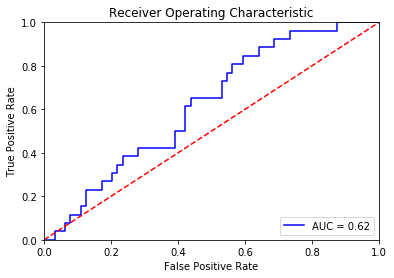

In [198]:
#make an ROC curve by plotting the false positive against true positive rate

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#Question 3

In [199]:
#this data was taken from: https://www.kaggle.com/kumarajarshi/life-expectancy-who

# Download the dataset
! if [ ! -e Life%Expectancy%Data.csv ]; \
then wget https://raw.githubusercontent.com/hwiegan1/DataScience/master/Life%20Expectancy%20Data.csv; \
fi;

# Read in the data and display a few rows
proj = pd.read_csv("Life Expectancy Data.csv")

#print the first ten rows
proj.head(10)

--2019-09-27 19:45:57--  https://raw.githubusercontent.com/hwiegan1/DataScience/master/Life%20Expectancy%20Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333442 (326K) [text/plain]
Saving to: ‘Life Expectancy Data.csv.4’

Life Expectancy Dat 100%[===================>] 325.63K  --.-KB/s    in 0.05s   

2019-09-27 19:45:57 (6.38 MB/s) - ‘Life Expectancy Data.csv.4’ saved [333442/333442]



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


Text(0, 0.5, 'Average expenditure (%)')

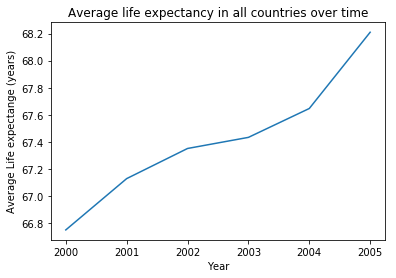

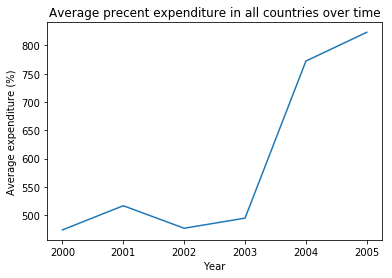

In [200]:
#extract data from the data frame
country = proj[['Country']]
year = proj[['Year']]
status = proj[['Status']]
life_expectancy = proj[['Life expectancy ']]
adult_mortality = proj[['Adult Mortality']]
infant_deaths = proj[['infant deaths']]
alcohol = proj[['Alcohol']]
percent_expenditure = proj[['percentage expenditure']]
hepB = proj[['Hepatitis B']]
measles = proj[['Measles ']]
BMI = proj[[' BMI ']]
polio = [['Polio']]

#find life expectancy by year
_2000 = proj.loc[(proj.Year==2000)]
life_expectancy_2000 = np.asarray(_2000[['Life expectancy ']])[:,0]

_2001 = proj.loc[(proj.Year==2001)]
life_expectancy_2001 = np.asarray(_2001[['Life expectancy ']])[:,0]

_2003 = proj.loc[(proj.Year==2003)]
life_expectancy_2003 = np.asarray(_2003[['Life expectancy ']])[:,0]

_2002 = proj.loc[(proj.Year==2002)]
life_expectancy_2002 = np.asarray(_2002[['Life expectancy ']])[:,0]

_2004 = proj.loc[(proj.Year==2004)]
life_expectancy_2004 = np.asarray(_2004[['Life expectancy ']])[:,0]

_2005 = proj.loc[(proj.Year==2005)]
life_expectancy_2005 = np.asarray(_2005[['Life expectancy ']])[:,0]

array = [np.mean(life_expectancy_2000), np.mean(life_expectancy_2001),np.mean(life_expectancy_2002),np.mean(life_expectancy_2003),np.mean(life_expectancy_2004),np.mean(life_expectancy_2005)]

time = [2000,2001,2002,2003,2004,2005]

#plot average life expectancy over time
plt.figure()
plt.plot(time,array)
plt.title('Average life expectancy in all countries over time')
plt.xlabel('Year')
plt.ylabel('Average Life expectange (years)')

#plot the average percent expenditure over time
percent_expenditure_2000 = np.asarray(_2000[['percentage expenditure']])[:,0]
percent_expenditure_2001 = np.asarray(_2001[['percentage expenditure']])[:,0]
percent_expenditure_2002 = np.asarray(_2002[['percentage expenditure']])[:,0]
percent_expenditure_2003 = np.asarray(_2003[['percentage expenditure']])[:,0]
percent_expenditure_2004 = np.asarray(_2004[['percentage expenditure']])[:,0]
percent_expenditure_2005 = np.asarray(_2005[['percentage expenditure']])[:,0]


mean_expend_array = [np.mean(percent_expenditure_2000), np.mean(percent_expenditure_2001),np.mean(percent_expenditure_2002),np.mean(percent_expenditure_2003),np.mean(percent_expenditure_2004),np.mean(percent_expenditure_2005)]

plt.figure()
plt.plot(time,mean_expend_array)
plt.title('Average precent expenditure in all countries over time')
plt.xlabel('Year')
plt.ylabel('Average expenditure (%)')



In [201]:
#linear regression model using the year to predict the average life span

#vectorize
X = np.asarray(time).reshape(len(time))
Y = np.asarray(array).reshape(len(time))

#construct the new data frame
d = {'Year': X, 'Life Expectancy': Y}
datframe = pd.DataFrame(data = d, columns = ['Year','Life Expectancy'])

#show new data frame
datframe.head(6)

,Year,Life Expectancy
0,2000,66.750273
1,2001,67.128962
2,2002,67.351366
3,2003,67.433333
4,2004,67.646448
5,2005,68.209290


In [202]:
#do linear regression on this
res = smf.ols('Y ~ X',data = datframe).fit()

#show results summary 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     62.16
Date:                Fri, 27 Sep 2019   Prob (F-statistic):            0.00140
Time:                        19:45:58   Log-Likelihood:                 4.7014
No. Observations:                   6   AIC:                            -5.403
Df Residuals:                       4   BIC:                            -5.819
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -443.4755     64.798     -6.844      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
